Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Company_Data.csv",encoding="latin1")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
df["Sales"].mean()

7.496325000000001

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [6]:
le=LabelEncoder()
df['Urban']=le.fit_transform(df['Urban'])
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,1,Yes
1,11.22,111,48,16,260,83,Good,65,10,1,Yes
2,10.06,113,35,10,269,80,Medium,59,12,1,Yes
3,7.40,117,100,4,466,97,Medium,55,14,1,Yes
4,4.15,141,64,3,340,128,Bad,38,13,1,No


In [7]:
df['US']=le.fit_transform(df['US'])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


In [8]:
df['ShelveLoc']=le.fit_transform(df['ShelveLoc'])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [9]:
df.loc[df["Sales"]<=7.5,"Sales"]=0
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,0.00,117,100,4,466,97,2,55,14,1,1
4,0.00,141,64,3,340,128,0,38,13,1,0


In [10]:
df.loc[df["Sales"]>7.5,"Sales"]=1
df['Sales'].unique()

array([1., 0.])

In [11]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [12]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((268, 10), (132, 10), (268,), (132,))

In [13]:
xtrain

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
258,108,38,0,251,81,0,72,14,0,0
177,138,72,0,148,94,2,27,17,1,1
119,130,94,8,137,128,2,64,12,1,1
194,112,98,18,481,128,2,45,11,1,1
229,98,104,0,404,72,2,27,18,0,0
...,...,...,...,...,...,...,...,...,...,...
71,148,51,16,148,150,2,58,17,0,1
106,102,33,0,217,139,2,70,18,0,0
270,119,26,0,284,89,1,26,10,1,0
348,132,102,20,459,107,1,49,11,1,1


In [14]:
ytrain

258    0.0
177    1.0
119    0.0
194    0.0
229    1.0
      ... 
71     0.0
106    0.0
270    1.0
348    1.0
102    0.0
Name: Sales, Length: 268, dtype: float64

In [15]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [16]:
model.score(xtrain,ytrain)

0.746268656716418

In [17]:
from sklearn import tree

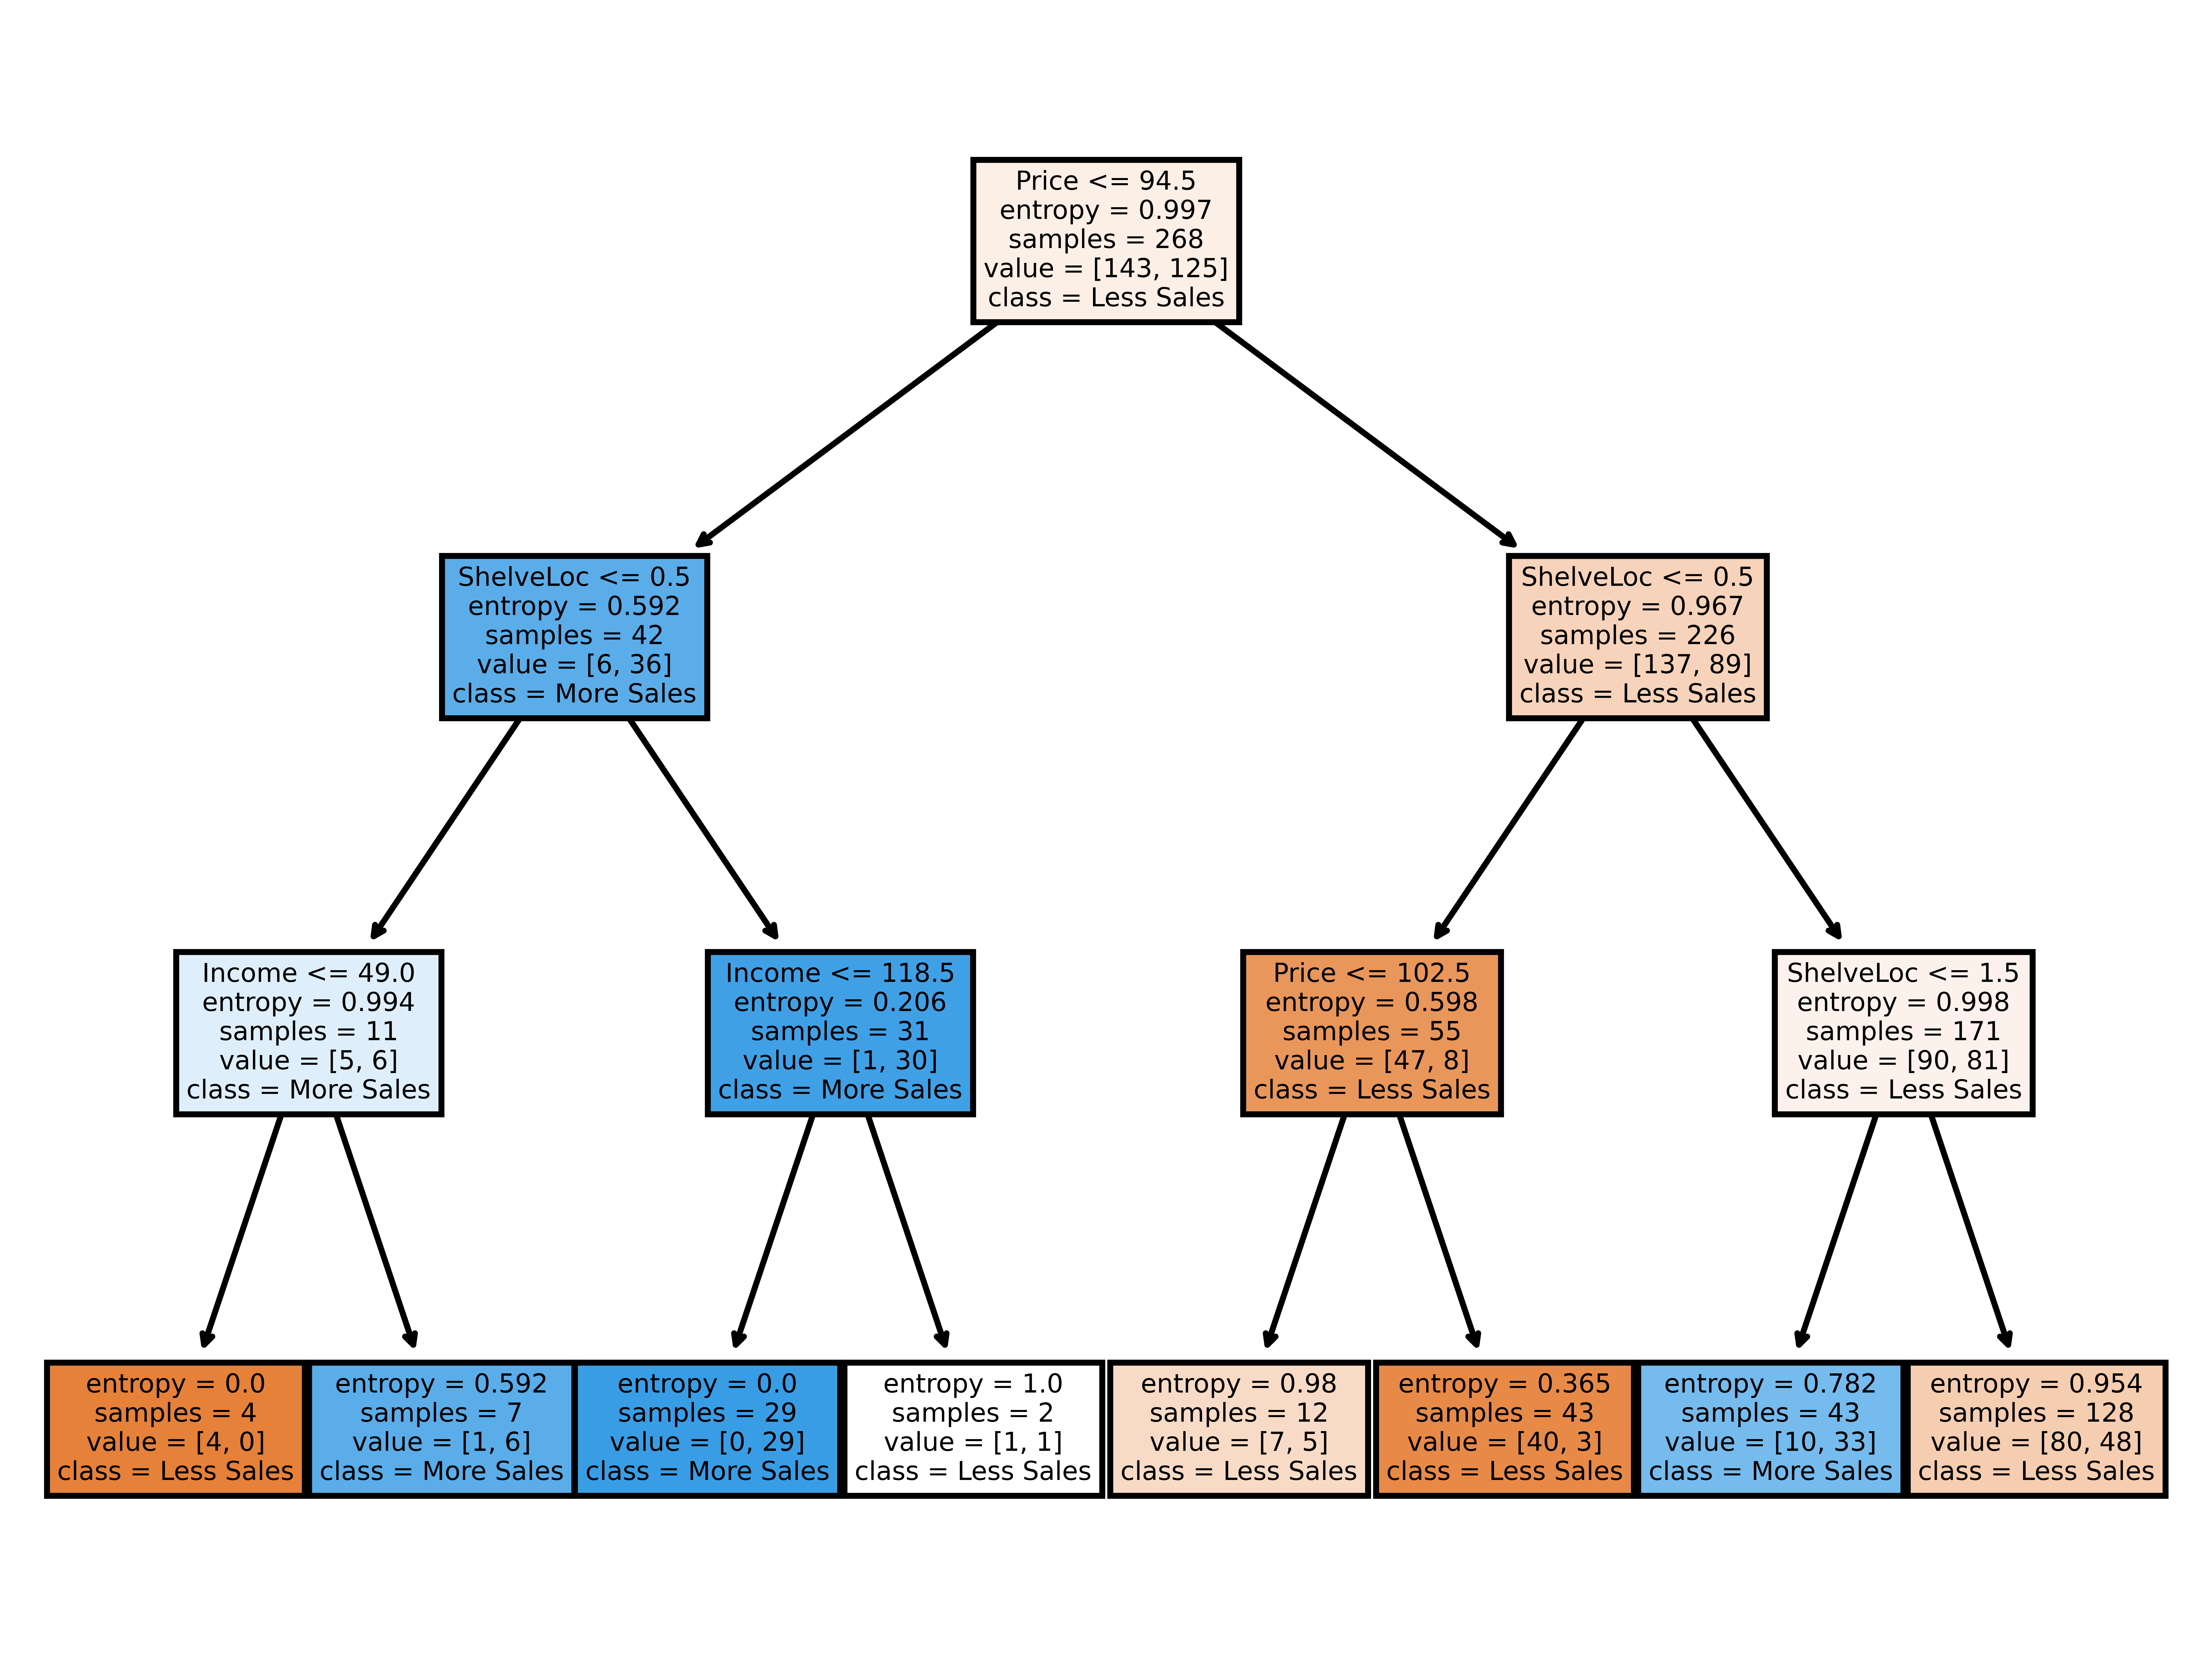

In [18]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price','ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Less Sales','More Sales']
plt.figure(dpi=1500)
tree.plot_tree(model,feature_names = fn,class_names=cn,filled = True);
